In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 10000, "display.max_columns", None)

# carga de dados obtidos do Potal de Dados Abertos do TSE https://dadosabertos.tse.jus.br
#   https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BR.zip
df = pd.read_csv ('votacao_secao_2022_BR/votacao_secao_2022_BR.csv', sep=";", na_values="#NULO", encoding='latin1')

In [2]:
cd_cargo = [1] # 1: presidente
grain = ["NR_TURNO", "SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO"]
pivot = "NR_VOTAVEL"
metric = "QT_VOTOS"

cols = [*grain, pivot, metric]

res_raw = df[
    (df["CD_CARGO"].isin(cd_cargo))
] [cols]

In [3]:
# pivot em NR_VOTAVEL -- códigos dos candidatos mais brancos e nulos (95 e 96)
res = pd.pivot_table(
    res_raw,
    index=grain, 
    columns="NR_VOTAVEL", 
    values="QT_VOTOS",
    aggfunc=np.sum, 
    margins=True,
    margins_name='Total',
    fill_value=0
)

# adiciona TotalValidos (menos brancos e nulos)
res["TotalValidos"] = res["Total"] - res[95] - res[96]

In [4]:
res_por_turno = res.sum(level=["NR_TURNO"])
res_por_uf = res.sum(level=["NR_TURNO", "SG_UF"])
res_por_municipio = res.sum(level=["NR_TURNO", "SG_UF", "NM_MUNICIPIO"])
res_por_zona = res.sum(level=["NR_TURNO", "SG_UF", "NM_MUNICIPIO", "NR_ZONA"])
res_por_secao = res.sum(level=["NR_TURNO", "SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO"])

In [5]:
# municipios com número maior Total de votos
res_por_municipio.query("NR_TURNO==2").sort_values(by=["Total"],ascending=[False]).head(100)

NR_VOTAVEL                              12       13  14  15  16  21       22  \
NR_TURNO SG_UF NM_MUNICIPIO                                                    
2        SP    SÃO PAULO                 0  3677921   0   0   0   0  3191484   
         RJ    RIO DE JANEIRO            0  1734159   0   0   0   0  1929209   
         DF    BRASÍLIA                  0   729295   0   0   0   0  1041331   
         BA    SALVADOR                  0  1089899   0   0   0   0   451131   
         MG    BELO HORIZONTE            0   703755   0   0   0   0   834548   
         CE    FORTALEZA                 0   880559   0   0   0   0   633009   
         AM    MANAUS                    0   437691   0   0   0   0   692580   
         PR    CURITIBA                  0   391675   0   0   0   0   720322   
         PE    RECIFE                    0   558690   0   0   0   0   433317   
         PA    BELÉM                     0   431858   0   0   0   0   427051   
         RS    PORTO ALEGRE              0   437798   0   0   0   0   380499   
         GO    GOIÂNIA                   0   289172   0   0   0   0   513018   
         SP    GUARULHOS                 0   337689   0   0   0   0   391234   
               CAMPINAS                  0   286779   0   0   0   0   368251   
         MA    SÃO LUÍS                  0   363131   0   0   0   0   238285   
         RJ    DUQUE DE CAXIAS           0   213922   0   0   0   0   299197   
         MS    CAMPO GRANDE              0   187109   0   0   0   0   313906   
         RJ    SÃO GONÇALO               0   222694   0   0   0   0   276870   
         SP    SÃO BERNARDO DO CAMPO     0   262223   0   0   0   0   224929   
         AL    MACEIÓ                    0   204887   0   0   0   0   273549   
         PI    TERESINA                  0   317918   0   0   0   0   160558   
         PB    JOÃO PESSOA               0   229251   0   0   0   0   228326   
         RJ    NOVA IGUAÇU               0   171677   0   0   0   0   291907   
         RN    NATAL                     0   246881   0   0   0   0   219306   
         SP    OSASCO                    0   222285   0   0   0   0   218756   
               SANTO ANDRÉ               0   207330   0   0   0   0   225767   
               SÃO JOSÉ DOS CAMPOS       0   159996   0   0   0   0   267615   
               SOROCABA                  0   154335   0   0   0   0   242074   
         MG    UBERLÂNDIA                0   190299   0   0   0   0   215660   
         PE    JABOATÃO DOS GUARARAPES   0   204012   0   0   0   0   161952   
         MG    CONTAGEM                  0   162786   0   0   0   0   202910   
         BA    FEIRA DE SANTANA          0   221406   0   0   0   0   124354   
         SP    RIBEIRÃO PRETO            0   139784   0   0   0   0   206363   
         SC    JOINVILLE                 0    81886   0   0   0   0   268079   
         MT    CUIABÁ                    0   133852   0   0   0   0   213787   
         SE    ARACAJU                   0   190875   0   0   0   0   142489   
         MG    JUIZ DE FORA              0   180954   0   0   0   0   141651   
         SC    FLORIANÓPOLIS             0   148344   0   0   0   0   169495   
         RJ    NITERÓI                   0   162882   0   0   0   0   155186   
         PR    LONDRINA                  0    83923   0   0   0   0   225349   
         RJ    SÃO JOÃO DE MERITI        0   112389   0   0   0   0   168876   
         RS    CAXIAS DO SUL             0    91262   0   0   0   0   180592   
         PA    ANANINDEUA                0   137406   0   0   0   0   138978   
         RJ    CAMPOS DOS GOYTACAZES     0   100427   0   0   0   0   171999   
         ES    VILA VELHA                0   103870   0   0   0   0   161933   
               SERRA                     0   123629   0   0   0   0   140048   
         SP    SANTOS                    0   113693   0   0   0   0   145874   
               DIADEMA                   0   154387   0   0   0   0   102841   


In [6]:
# seções com 0 votos para Lula
res_por_secao.query("NR_TURNO==2")[13].value_counts()[0]

5

In [7]:
# por orderm de numero de votos (Lula ascendente, Lula descendente)
res_por_secao.query("NR_TURNO==2").sort_values(by=[13,22],ascending=[True, False]).head(100)

NR_VOTAVEL                                              12  13  14  15  16  \
NR_TURNO SG_UF NM_MUNICIPIO           NR_ZONA NR_SECAO                       
2        RS    CHARRUA                100     15         0   0   0   0   0   
         PA    CHAVES                 17      41         0   0   0   0   0   
         ZZ    CARACAS                1       78         0   0   0   0   0   
                                              79         0   0   0   0   0   
               CIUDAD GUAYANA         1       91         0   0   0   0   0   
         RS    ILÓPOLIS               145     119        0   1   0   0   0   
         PA    JACAREACANGA           102     44         0   1   0   0   0   
         PR    TOLEDO                 75      329        0   1   0   0   0   
         ZZ    KINSHASA               1       146        0   1   0   0   0   
         RS    CÂNDIDO GODÓI          166     81         0   2   0   0   0   
                                              116        0   2   0   0   0   
         PA    ITAITUBA               34      235        0   2   0   0   0   
         ZZ    KATMANDU               1       494        0   2   0   0   0   
               PORTO PRÍNCIPE         1       353        0   2   0   0   0   
         RS    CÂNDIDO GODÓI          166     82         0   3   0   0   0   
         MT    JUÍNA                  35      97         0   3   0   0   0   
         ZZ    CONCEPCIÓN             1       96         0   3   0   0   0   
         SP    RIOLÂNDIA              164     61         0   3   0   0   0   
               SÃO JOSÉ DO RIO PRETO  268     328        0   3   0   0   0   
         PR    TOLEDO                 75      359        0   4   0   0   0   
         RS    GARIBALDI              98      1          0   4   0   0   0   
               ANTÔNIO PRADO          6       15         0   4   0   0   0   
               NOVA BRÉSCIA           104     103        0   4   0   0   0   
         MG    MACHADO                164     161        0   4   0   0   0   
         PA    MONTE ALEGRE           19      87         0   4   0   0   0   
         RS    VESPASIANO CORRÊA      67      141        0   4   0   0   0   
               TAQUARA                55      118        0   4   0   0   0   
         ZZ    WINDHOEK               1       1524       0   4   0   0   0   
         RS    MAXIMILIANO DE ALMEIDA 95      106        0   4   0   0   0   
         PR    TOLEDO                 75      364        0   5   0   0   0   
                                              275        0   5   0   0   0   
         RS    COQUEIRO BAIXO         104     106        0   5   0   0   0   
         AC    CAPIXABA               2       101        0   5   0   0   0   
         MT    CAMPO NOVO DO PARECIS  60      93         0   5   0   0   0   
         PA    SANTARÉM               83      239        0   5   0   0   0   
         MT    QUERÊNCIA              53      155        0   5   0   0   0   
         AM    HUMAITÁ                17      109        0   5   0   0   0   
         MG    PATOS DE MINAS         330     123        0   5   0   0   0   
         SC    SÃO JOSÉ               84      271        0   5   0   0   0   
         MG    LAGOA FORMOSA          330     43         0   5   0   0   0   
         SP    SÃO PAULO              250     460        0   5   0   0   0   
         AM    MANAUS                 62      1006       0   5   0   0   0   
         SP    SÃO VICENTE            340     457        0   5   0   0   0   
         RO    PIMENTA BUENO          9       999        0   5   0   0   0   
         ZZ    PUERTO IGUAZÚ          1       1504       0   5   0   0   0   
         PR    PRUDENTÓPOLIS          30      30         0   6   0   0   0   
                                              125        0   6   0   0   0   
         RS    COXILHA                33      50         0   6   0   0   0   
         PR    TOLEDO                 75      211        0   6   0   0   0   
         RS    ESPUMOS

In [8]:
# seções com 0 votos para Bolsonaro
res_por_secao.query("NR_TURNO==2")[22].value_counts()[0]

144

In [9]:
# por ordem de numero de votos (Bolsonaro ascendente, Lula descendente)
res_por_secao.query("NR_TURNO==2").sort_values(by=[22,13],ascending=[True, False]).head(150)

NR_VOTAVEL                                                 12   13  14  15  \
NR_TURNO SG_UF NM_MUNICIPIO              NR_ZONA NR_SECAO                    
2        MT    CONFRESA                  28      158        0  383   0   0   
         AM    SÃO PAULO DE OLIVENÇA     22      86         0  350   0   0   
                                                 80         0  347   0   0   
         MA    FERNANDO FALCÃO           97      205        0  310   0   0   
               MARANHÃOZINHO             101     78         0  307   0   0   
         AM    SANTO ANTÔNIO DO IÇÁ      47      10         0  303   0   0   
         RS    CHARRUA                   100     126        0  302   0   0   
         MA    FERNANDO FALCÃO           97      185        0  283   0   0   
         AM    SÃO PAULO DE OLIVENÇA     22      44         0  277   0   0   
         MA    ITAIPAVA DO GRAJAÚ        15      314        0  277   0   0   
         MT    CAMPINÁPOLIS              26      189        0  265   0   0   
         MA    MONTES ALTOS              103     80         0  264   0   0   
                                                 28         0  260   0   0   
         MT    SANTA TEREZINHA           16      86         0  248   0   0   
         AM    SÃO GABRIEL DA CACHOEIRA  19      13         0  239   0   0   
               BARREIRINHA               26      63         0  237   0   0   
         PR    ORTIGUEIRA                167     96         0  223   0   0   
         MA    SÃO BENEDITO DO RIO PRETO 73      67         0  213   0   0   
         AM    SÃO GABRIEL DA CACHOEIRA  19      25         0  207   0   0   
         MG    BERTÓPOLIS                4       152        0  207   0   0   
         MS    DOIS IRMÃOS DO BURITI     49      68         0  206   0   0   
         AM    SÃO GABRIEL DA CACHOEIRA  19      65         0  204   0   0   
         MA    PEDRO DO ROSÁRIO          106     54         0  204   0   0   
         AM    SANTA ISABEL DO RIO NEGRO 30      22         0  196   0   0   
               SÃO GABRIEL DA CACHOEIRA  19      92         0  195   0   0   
         PA    SÃO FÉLIX DO XINGU        53      218        0  194   0   0   
         RR    UIRAMUTÃ                  7       63         0  176   0   0   
         AM    ATALAIA DO NORTE          42      29         0  175   0   0   
         BA    PILÃO ARCADO              195     132        0  173   0   0   
         AM    SÃO GABRIEL DA CACHOEIRA  19      48         0  166   0   0   
         MG    BERTÓPOLIS                4       178        0  165   0   0   
         AM    SÃO GABRIEL DA CACHOEIRA  19      87         0  162   0   0   
         CE    SANTANA DO CARIRI         53      50         0  159   0   0   
         PA    ANAPU                     80      254        0  157   0   0   
         AM    SANTA ISABEL DO RIO NEGRO 30      26         0  156   0   0   
         AC    MARECHAL THAUMATURGO      4       326        0  153   0   0   
         MA    TURIAÇU                   39      58         0  148   0   0   
         AM    TABATINGA                 36      98         0  146   0   0   
         BA    CANARANA                  174     111        0  141   0   0   
               SEABRA                    88      181        0  141   0   0   
         AM    ATALAIA DO NORTE          42      25         0  138   0   0   
               SÃO GABRIEL DA CACHOEIRA  19      59         0  135   0   0   
               TABATINGA                 36      100        0  132   0   0   
         MA    PRESIDENTE SARNEY         106     224        0  130   0   0   
         AM    ATALAIA DO NORTE          42      28         0  127   0   0   
         MA    PRESIDENTE VARGAS         50      151        0  121   0   0   
               PENALVA                   45      63         0  119   0   0   
         PI    CORONEL JOSÉ DIAS         13      242        0  119   0   0   
         BA    BOQUIRA                   65      247        0  117   0   0   
         PI    SÃO BRA

<AxesSubplot:xlabel='22', ylabel='13'>

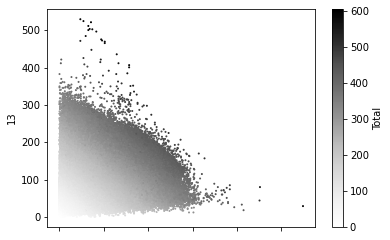

In [10]:
res_por_secao.query("NR_TURNO==2").plot.scatter(x=22, y=13, s=1, c="Total")

array([[<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'22'}>]], dtype=object)

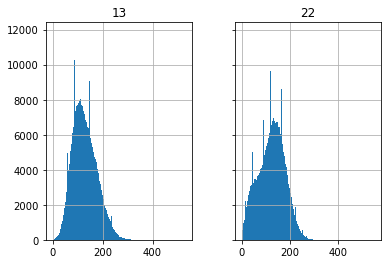

In [11]:
res_por_secao.query("NR_TURNO==2").hist([13,22], bins=256, sharey=True)

In [12]:
res_por_secao["13/Total"] = res_por_secao[13] / res_por_secao["Total"]

In [13]:
res_por_secao["22/Total"] = res_por_secao[22] / res_por_secao["Total"]

<AxesSubplot:xlabel='22/Total', ylabel='13/Total'>

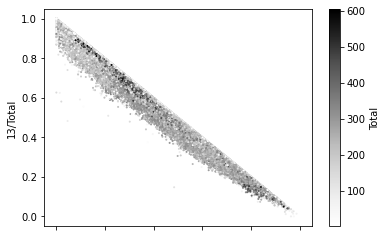

In [14]:
res_por_secao.query("NR_TURNO==2").plot.scatter(x="22/Total", y="13/Total", s=1, c="Total")